# Predict stock price for next day using linear regression
### Given prices for the last N days, we train our LR model, and predict for day N+1

In [2]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
import datetime

In [3]:
#Get the stock quote, load data into a dataframe
df =pd.read_csv("AppleDataset.csv")
#Show the data
df

,Date,DateCode,Open,High,Low,Close,Volume,High/low ratio,1 day slope,3 days slope,5 days slope,7 days slope,11 days slope,31 days slope
0,12/12/1980,1,0.51,0.52,0.51,0.51,2093900,1.019608,0.00,-0.020000,-0.006000,0.002857,0.011818,0.001429
1,15/12/1980,2,0.49,0.49,0.49,0.49,785200,1.000000,0.00,-0.010000,0.002000,0.008571,0.012727,0.002857
2,16/12/1980,3,0.45,0.45,0.45,0.45,472000,1.000000,0.00,0.010000,0.016000,0.018571,0.014545,0.005238
3,17/12/1980,4,0.46,0.46,0.46,0.46,385900,1.000000,0.00,0.013333,0.018000,0.024286,0.014545,0.004286
4,18/12/1980,5,0.48,0.48,0.48,0.48,327900,1.000000,0.00,0.016667,0.020000,0.022857,0.010909,0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,24/12/2019,9845,284.69,284.89,282.92,284.27,12119714,1.006963,-0.42,1.843333,1.876000,0.028877,0.028877,0.028877
9845,26/12/2019,9846,284.82,289.98,284.70,289.91,23334004,1.018546,5.09,0.536667,0.029447,0.029447,0.029447,0.029447
9846,27/12/2019,9847,291.12,293.97,288.12,289.80,36592936,1.020304,-1.32,1.283333,0.029433,0.029433,0.029433,0.029433
9847,30/12/2019,9848,289.46,292.69,285.22,291.52,36059614,1.026190,2.06,0.029605,0.029605,0.029605,0.029605,0.029605


In [ ]:
# Convert Date column to datetime
df=df.rename(columns={'Close**':'Close'})

In [4]:
#change the data format to "%Y-%m-%d"
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d")
df

,Date,DateCode,Open,High,Low,Close,Volume,High/low ratio,1 day slope,3 days slope,5 days slope,7 days slope,11 days slope,31 days slope
0,1980-12-12,1,0.51,0.52,0.51,0.51,2093900,1.019608,0.00,-0.020000,-0.006000,0.002857,0.011818,0.001429
1,1980-12-15,2,0.49,0.49,0.49,0.49,785200,1.000000,0.00,-0.010000,0.002000,0.008571,0.012727,0.002857
2,1980-12-16,3,0.45,0.45,0.45,0.45,472000,1.000000,0.00,0.010000,0.016000,0.018571,0.014545,0.005238
3,1980-12-17,4,0.46,0.46,0.46,0.46,385900,1.000000,0.00,0.013333,0.018000,0.024286,0.014545,0.004286
4,1980-12-18,5,0.48,0.48,0.48,0.48,327900,1.000000,0.00,0.016667,0.020000,0.022857,0.010909,0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,2019-12-24,9845,284.69,284.89,282.92,284.27,12119714,1.006963,-0.42,1.843333,1.876000,0.028877,0.028877,0.028877
9845,2019-12-26,9846,284.82,289.98,284.70,289.91,23334004,1.018546,5.09,0.536667,0.029447,0.029447,0.029447,0.029447
9846,2019-12-27,9847,291.12,293.97,288.12,289.80,36592936,1.020304,-1.32,1.283333,0.029433,0.029433,0.029433,0.029433
9847,2019-12-30,9848,289.46,292.69,285.22,291.52,36059614,1.026190,2.06,0.029605,0.029605,0.029605,0.029605,0.029605


In [7]:
# show number of trading days 
#luigi note: remove last 15 rows
df.drop(df.tail(31).index,inplace=True)
df.shape
# it's 9849

(9818, 14)

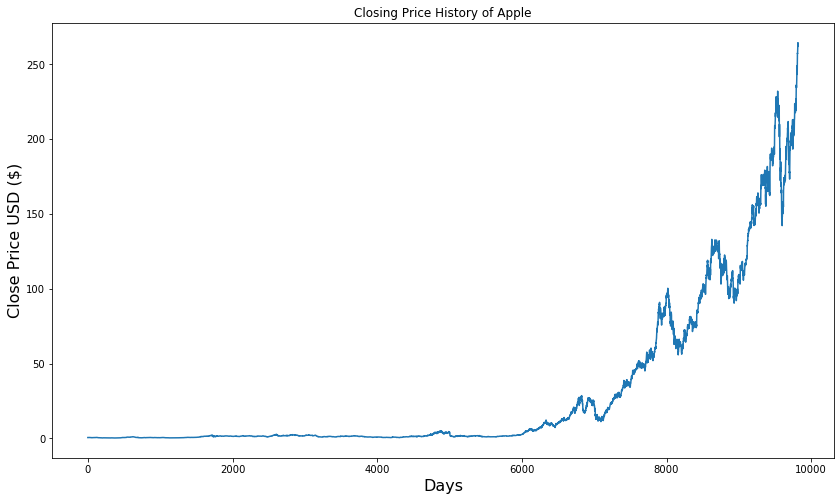

In [8]:
#Visualize the closing price history
plt.figure(figsize=(14,8))
plt.title('Closing Price History of Apple')
plt.plot(df['Close'])
plt.xlabel('Days', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

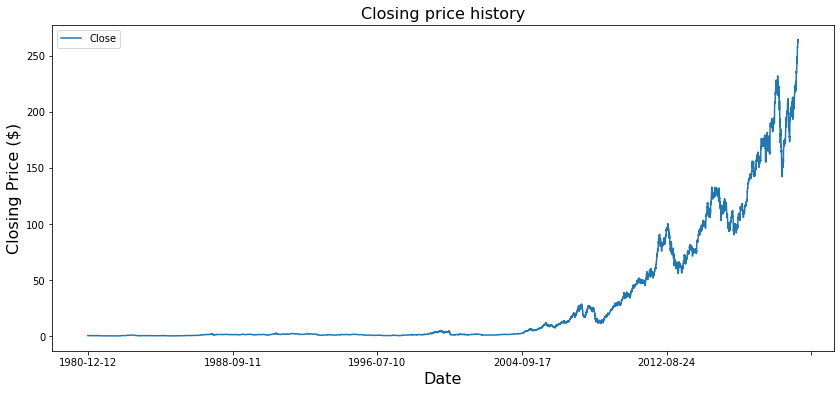

In [9]:
df.plot( x= 'Date',y='Close', kind='line',figsize=(14,6))  

plt.title('Closing price history',fontsize=16)  
plt.xlabel('Date',fontsize=16)  
plt.ylabel('Closing Price ($)',fontsize=16)  
plt.show()

In [10]:
# The term bfill means that we use the value before filling in missing values df.bfill()
df.isnull()
df.fillna(0)# filling missing values with 0
df


,Date,DateCode,Open,High,Low,Close,Volume,High/low ratio,1 day slope,3 days slope,5 days slope,7 days slope,11 days slope,31 days slope
0,1980-12-12,1,0.51,0.52,0.51,0.51,2093900,1.019608,0.00,-0.020000,-0.006,0.002857,0.011818,0.001429
1,1980-12-15,2,0.49,0.49,0.49,0.49,785200,1.000000,0.00,-0.010000,0.002,0.008571,0.012727,0.002857
2,1980-12-16,3,0.45,0.45,0.45,0.45,472000,1.000000,0.00,0.010000,0.016,0.018571,0.014545,0.005238
3,1980-12-17,4,0.46,0.46,0.46,0.46,385900,1.000000,0.00,0.013333,0.018,0.024286,0.014545,0.004286
4,1980-12-18,5,0.48,0.48,0.48,0.48,327900,1.000000,0.00,0.016667,0.020,0.022857,0.010909,0.005238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,2019-08-11,9814,258.69,260.44,256.85,260.14,17520495,1.013977,1.45,0.606667,0.500,0.994286,0.149091,0.322857
9814,2019-11-11,9815,258.30,262.47,258.28,262.20,20507459,1.016223,3.90,0.756667,0.712,0.584286,0.379091,0.299048
9815,2019-12-11,9816,261.55,262.79,260.92,261.96,21847226,1.007167,0.41,0.226667,1.028,0.175714,0.211818,0.419524
9816,2019-11-13,9817,261.13,264.78,261.07,264.47,25817593,1.014211,3.34,0.430000,0.364,-0.351429,0.306364,0.332857


In [11]:
 #We split this dataset into 60% train, 20% validation, and 20% test. The model will be trained using the train set, model hyperparameters will be tuned using the validation set,
 #and the performance of the model will be reported using the test set

test_size = 0.2                 # proportion of dataset to be used as test set
val_size = 0.2                   # proportion of dataset to be used as validation set


# split data into train , valid and test sets 

# Get sizes of each of the datasets
num_val = int(val_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_val - num_test
print("num_train = " + str(num_train))
print("num_val = " + str(num_val))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train].copy()
print("type",type(train))
validation = df[num_train:num_train+num_val].copy()
train_val = df[:num_train+num_val].copy()
test = df[num_train+num_val:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(validation.shape))
print("train_val.shape = " + str(train_val.shape))
print("test.shape = " + str(test.shape))

num_train = 5892
num_val = 1963
num_test = 1963
type <class 'pandas.core.frame.DataFrame'>
train.shape = (5892, 14)
cv.shape = (1963, 14)
train_val.shape = (7855, 14)
test.shape = (1963, 14)


In [12]:
# we will use a function 'get_preds_lr()to train the model and get prediction
#we will fit a linear regression model to the previous N values, and use this model to predict the value on the current day£
def get_preds_lr(df, colToPredict, N, pred_min, offset):
    """
    Given a dataframe, get prediction at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe with the values you want to predict
        colToPredict : name of the column you want to predict
        N          : use previous N values to do prediction
        pred_min   : all predictions should be >= pred_min
        offset     : for df we only do predictions for df[offset:]
    Outputs
        pred_list  : the predictions for colToPredict. np.array of length len(df)-offset.
    """
    # Create linear regression object
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['Close'])):
        X_train = np.array(range(len(df['Close'][i-N:i]))) 
        y_train = np.array(df['Close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)     
        y_train = y_train.reshape(-1, 1)
   
        regr.fit(X_train, y_train) # Train the model
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0]) # Predict the footfall using the model
    
    # If the values are < pred_min, set it to be pred_min
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
   
    return pred_list

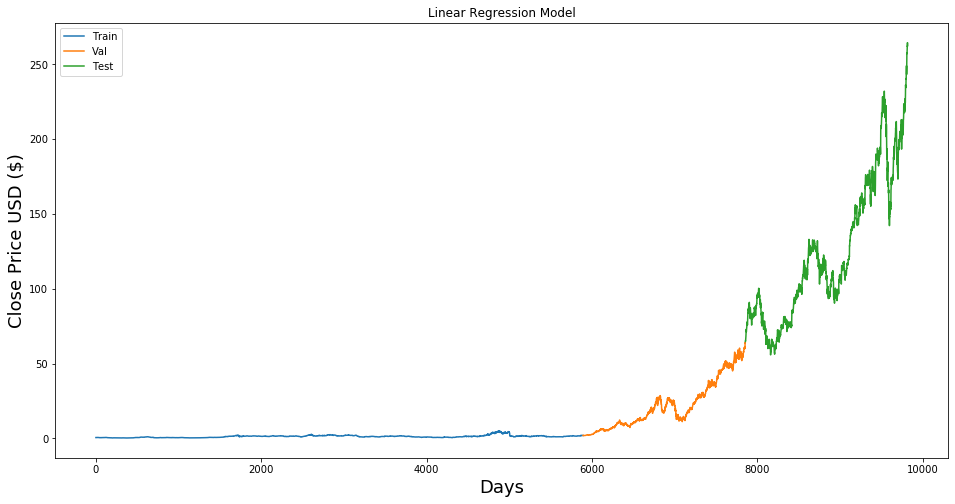

In [13]:

# Plot close price over time

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close']])
plt.plot(test[['Close']])
plt.legend(['Train', 'Val', 'Test'], loc='upper left')
plt.show()

In [14]:
# predict using linear regression
RMSE = []
MAE = []
R2=[]
Nmax=30
from sklearn.metrics import mean_squared_error
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    pred_list = get_preds_lr(train_val, 'Close', N, 0, num_train)
    
    validation.loc[:, 'Pred' + '_N' + str(N)] = pred_list # to get all the value of predN
    RMSE.append(math.sqrt(mean_squared_error(pred_list, validation['Close'])))
    MAE.append( np.mean(np.abs((pred_list - validation['Close']) / pred_list)) * 100)
    R2.append(r2_score(pred_list, validation['Close']))
print(validation)
print('RMSE = ' + str(RMSE))  
print('MAE = ' + str(MAE))
print('R^2= ' + str(R2))   

    

            Date  DateCode   Open   High    Low  Close    Volume  \
5892  2004-04-14      5893   1.92   1.93   1.88   1.90  11627697   
5893  2004-04-15      5894   2.09   2.11   2.01   2.09  31462888   
5894  2004-04-16      5895   2.08   2.09   2.04   2.08   7195357   
5895  2004-04-19      5896   2.01   2.05   1.99   2.03  12720556   
5896  2004-04-20      5897   2.02   2.03   1.97   1.98   6331549   
...          ...       ...    ...    ...    ...    ...       ...   
7850  2012-01-23      7851  60.42  61.21  60.33  61.06  10930778   
7851  2012-01-24      7852  60.71  60.73  59.94  60.06  19558472   
7852  2012-01-25      7853  64.89  64.92  63.39  63.81  34223692   
7853  2012-01-26      7854  64.06  64.11  63.31  63.52  11579673   
7854  2012-01-27      7855  63.48  64.07  63.40  63.90  10710233   

      High/low ratio  1 day slope  3 days slope  ...   Pred_N21   Pred_N22  \
5892        1.026596        -0.02      0.060000  ...   2.004905   1.992208   
5893        1.049751       

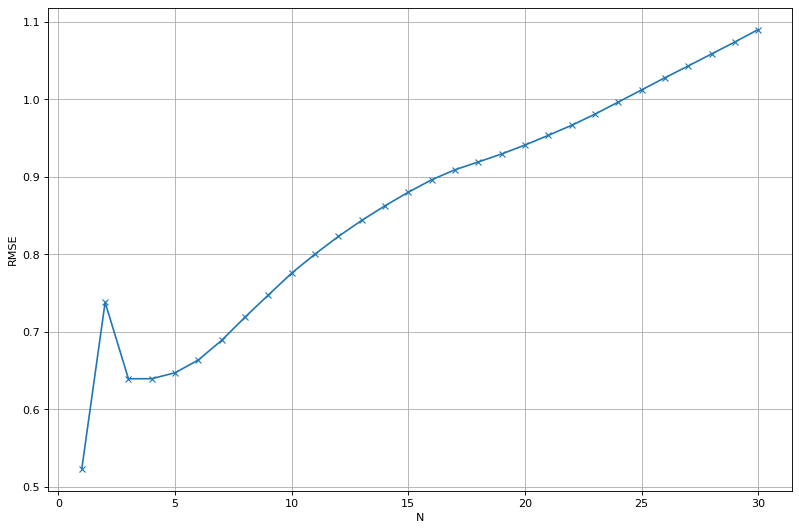

In [15]:
#Below plot shows the RMSE between the actual and predicted values on the validation set,for various values of N

#We will use N=1 or 3  since it gives the lowest RMSE.

#matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE , 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.show()

Text(0, 0.5, 'MAE')

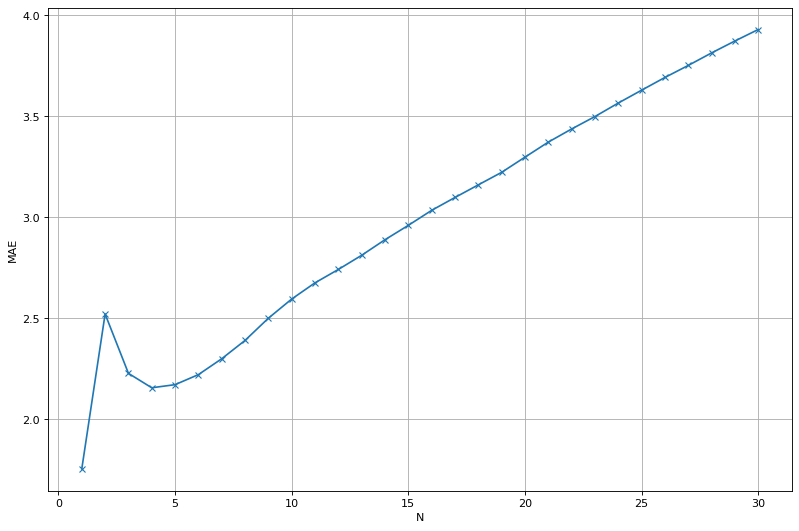

In [16]:

# Plot MAE between the actual and predicted values on the validation set,
#for various values of N. MAE the smaller the  better. (N=1 or 4)
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), MAE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAE')

Text(0, 0.5, 'R2')

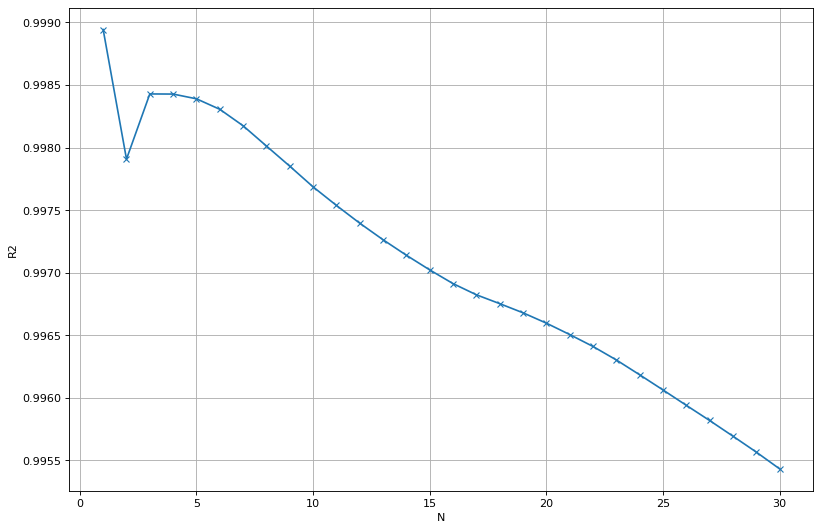

In [17]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), R2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')

# for R2 the higher the value , the better is the performance

In [18]:

# Set optimum N (1 or 3)
#N_opt=1
N_opt = 3

In [19]:
dataPred = pd.DataFrame({'Actual': validation['Close'].values.flatten(), 'PredictedN1': validation['Pred_N1'].values.flatten(),'PredictedN3': validation['Pred_N3'].values.flatten()})
dataPred

,Actual,PredictedN1,PredictedN3
0,1.90,1.92,1.913333
1,2.09,1.90,1.840000
2,2.08,2.09,2.140000
3,2.03,2.08,2.203333
4,1.98,2.03,2.006667
...,...,...,...
1958,61.06,60.04,59.556667
1959,60.06,61.06,60.686667
1960,63.81,60.06,60.406667
1961,63.52,63.81,64.393333


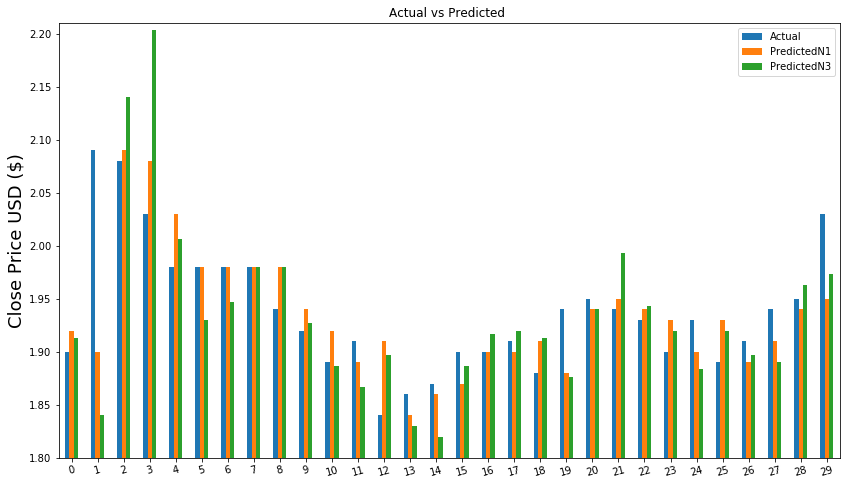

In [22]:
dt = dataPred.head(30)

dt.plot.bar(rot=15, title="Actual vs Predicted ",figsize=(14,8));
plt.ylim(1.8,2.21)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show(block=True);
# Our model is not quite precise, however the predicted values are pretty close to the actual ones.

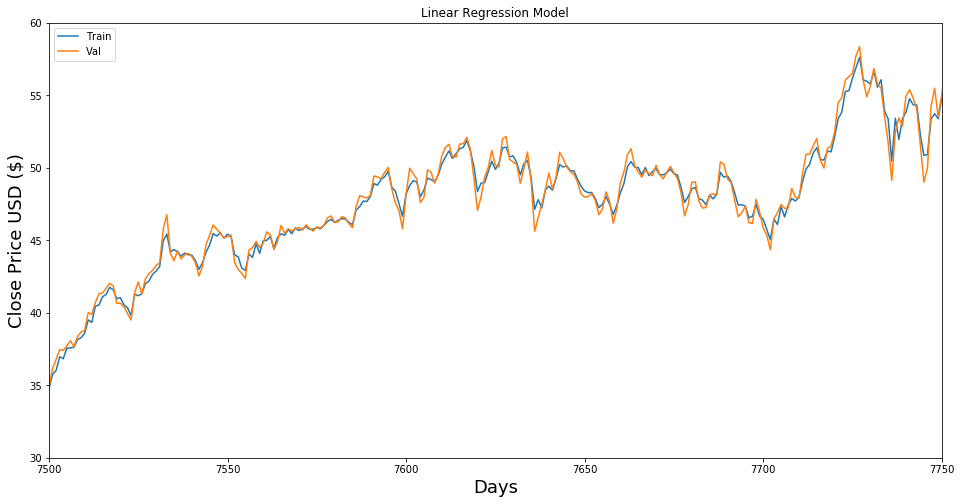

In [28]:
# Plot close over time

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
#plt.plot(validation['Close'])
#plt.plot(test[['Close']])
plt.plot(validation['Pred_N1'])
plt.plot(validation['Pred_N3'])
plt.xlim(7500,7750)
plt.ylim(30,60)
plt.legend(['Train', 'Val', 'Test','predictions with N=1','predictions with N=3'], loc='upper left')
plt.show()

It can be observed that this method captures changes in trends very well.

In [29]:
#Final test 
pred_list = get_preds_lr(df, 'Close', N_opt, 0, num_train+num_val)
test.loc[:, 'Pred' + '_N' + str(N_opt)] = pred_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(pred_list, test['Close'])))
print("R2 = %0.3f" % r2_score(test['Close'], pred_list))
print("MAE =", np.mean(np.abs((pred_list - test['Close']) / pred_list)) * 100)

test.head()



RMSE = 2.707
R2 = 0.997
MAE = 1.478958370203243


,Date,DateCode,Open,High,Low,Close,Volume,High/low ratio,1 day slope,3 days slope,5 days slope,7 days slope,11 days slope,31 days slope,Pred_N3
7855,2012-01-30,7856,63.69,64.84,63.63,64.72,13547439,1.019016,1.03,0.150000,0.190,0.322857,0.643636,0.560476,63.833333
7856,2012-01-31,7857,65.12,65.46,64.72,65.21,13996855,1.011434,0.09,-0.063333,0.214,0.412857,0.688182,0.584762,65.246667
7857,2012-01-02,7858,65.50,65.57,65.08,65.17,9644366,1.007529,-0.33,0.166667,0.362,0.754286,0.539091,0.600476,65.920000
7858,2012-02-02,7859,65.14,65.31,64.85,65.02,6671221,1.007093,-0.12,0.420000,0.616,0.781429,0.610909,0.612381,65.483333
7859,2012-03-02,7860,65.33,65.71,65.08,65.67,10245287,1.009680,0.34,0.436667,0.956,0.875714,0.550909,0.500000,64.943333


In [30]:
Pred = pd.DataFrame({'Actual': test['Close'].values.flatten(), 'Predicted': test['Pred_N3'].values.flatten()})
Pred

,Actual,Predicted
0,64.72,63.833333
1,65.21,65.246667
2,65.17,65.920000
3,65.02,65.483333
4,65.67,64.943333
...,...,...
1958,260.14,260.233333
1959,262.20,261.836667
1960,261.96,263.360000
1961,264.47,263.253333


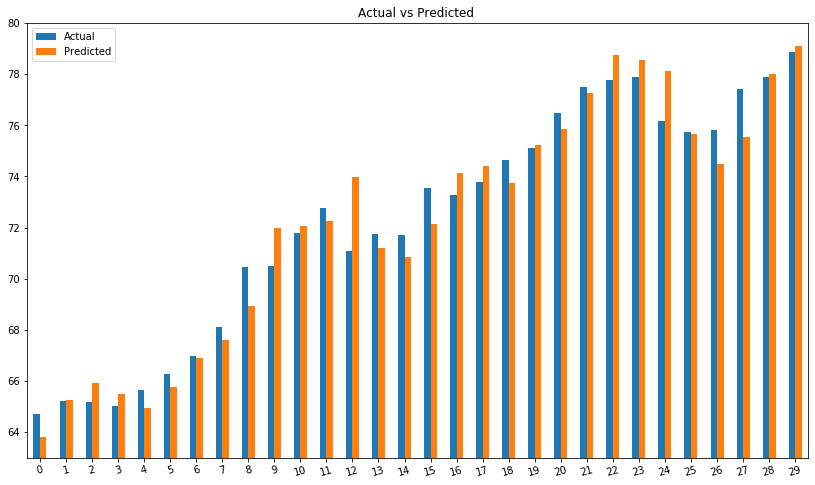

In [36]:
dt = Pred.head(30)

dt.plot.bar(rot=15, title="Actual vs Predicted ",figsize=(14,8));
plt.ylim(63, 80)
plt.show(block=True);

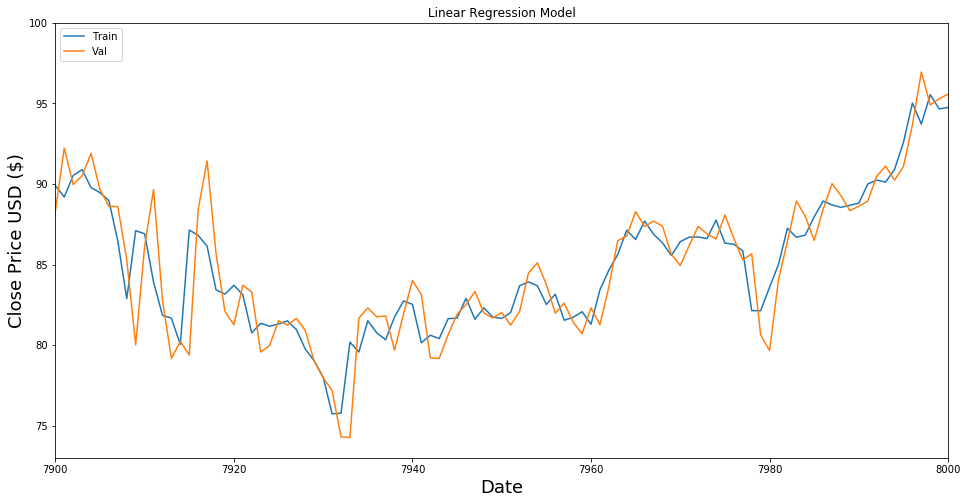

In [48]:

# Plot close over time

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
#plt.plot(validation['Close'])
plt.plot(test[['Close']])
plt.plot(test['Pred_N3'])
plt.xlim(7900,8000)
plt.ylim(73,100)
plt.legend(['Train', 'Val', 'Test','predictions with N=3'], loc='upper left')




plt.show()

# Key Findings
### On the validation set, the lowest RMSE is 0.5344589495135091 which is achieved using N=1, ie. using value on day t-1 to predict value on day t. The next lowest RMSE is 0.6486369312007897 which is achieved using N=3, ie. using values from days t-3 to t-1 to predict value on day t. We will use N_opt=3 in this project since our aim here is to use linear regression. On the test set, the RMSE is RMSE = 2.734

